#Exp 2 - Linear regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing


In [23]:
df  = pd.read_csv("california_housing_test.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Epoch 0 - Cost: 27900771894.0285
Epoch 100 - Cost: 6437876922.3044
Epoch 200 - Cost: 3460623965.5553
Epoch 300 - Cost: 2983033191.3852
Epoch 400 - Cost: 2858488219.0440
Epoch 500 - Cost: 2792528965.2807
Epoch 600 - Cost: 2742734249.9037
Epoch 700 - Cost: 2701727735.6352
Epoch 800 - Cost: 2667321592.2813
Epoch 900 - Cost: 2638289156.4041

Evaluation Metrics:
MSE  = 4713676935.8791
RMSE = 68656.2228
R²   = 0.6257


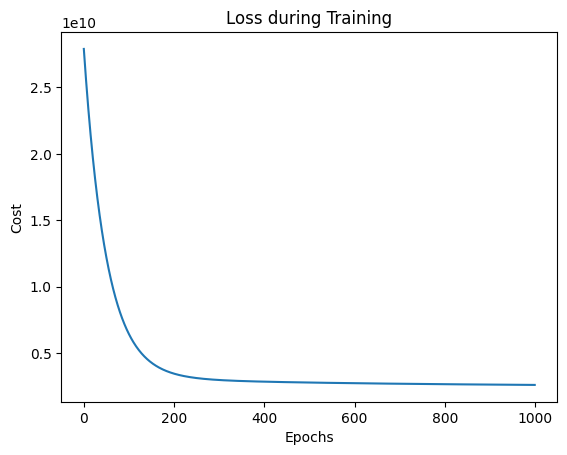

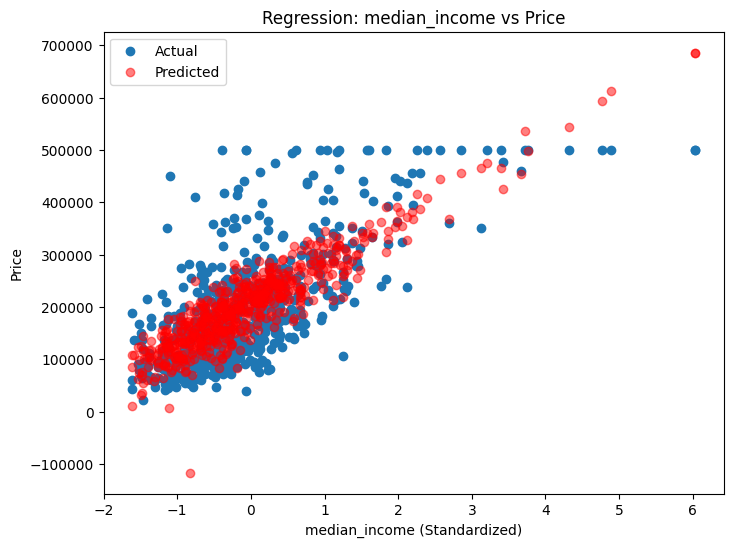

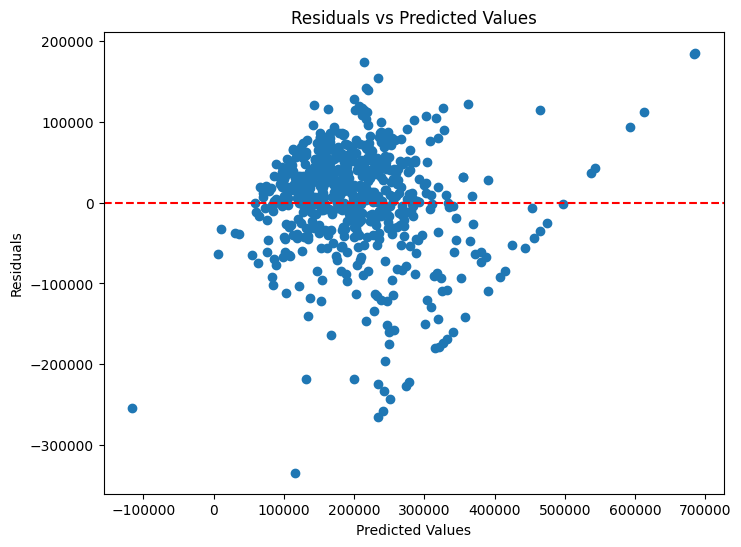

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv("california_housing_test.csv")
print("Columns:", df.columns)  
df.rename(columns={'median_house_value': 'price'}, inplace=True)

features = df.columns[df.columns != 'price']
df[features] = (df[features] - df[features].mean()) / df[features].std()

X = df.drop('price', axis=1).values
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w = np.random.randn(1, X_train.shape[1])
b = 0
learning_rate = 0.01
def for_prop(w, b, X):
    z = np.dot(w, X.T) + b
    return z.T
def cost(z, y):
    m = y.shape[0]
    return (1 / (2 * m)) * np.sum((z - y) ** 2)
def back_prop(z, y, X):
    m = y.shape[0]
    dz = z - y
    dw = (1 / m) * np.dot(dz.T, X)
    db = (1 / m) * np.sum(dz)
    return dw, db
def gradient_descent(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b
def linear_model(X_train, y_train, X_test, y_test, epochs):
    global w, b
    losses = []
    for i in range(epochs):
        z = for_prop(w, b, X_train)
        c = cost(z, y_train)
        dw, db = back_prop(z, y_train, X_train)
        w, b = gradient_descent(w, b, dw, db, learning_rate)
        losses.append(c)
        if i % 100 == 0:
            print(f"Epoch {i} - Cost: {c:.4f}")
    return w, b, losses

w, b, losses = linear_model(X_train, y_train, X_test, y_test, epochs=1000)

y_pred = for_prop(w, b, X_test)

mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss during Training")
plt.show()

feature_name = 'median_income' 
if feature_name in df.columns:
    feature_index = df.columns.get_loc(feature_name)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, feature_index], y_test, label='Actual')
    plt.scatter(X_test[:, feature_index], y_pred, color='red', alpha=0.5, label='Predicted')
    plt.xlabel(f"{feature_name} (Standardized)")
    plt.ylabel("Price")
    plt.title(f"Regression: {feature_name} vs Price")
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feature_name}' not found.")

residuals = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()